In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
csv_path = "JBEI_ABF_DIVA_Cost_FY18 - final.csv"
df = pd.read_csv(csv_path)
# df.head()
df = df.fillna('DNA Sequencing')

In [3]:
df.head()

,Quarter,Date,DIVA User,DIVA Project PI,JBEI-ABF DIVA Design link or Name,Project,DIVA Service,Number Rn/Construct/Sample,Cost,Project ID-Activity Code,Diva Team,Hours
0,FY2018-Q2,1/2/18,ggoyal@lbl.gov,njhillson@lbl.gov,https://diva.jbei.org/design/1699,Ajinomoto dodecanol Cycle2,Full DNA construction,4,$0.00,105129-001,GG,0.00
1,FY2018-Q2,1/2/18,ggoyal@lbl.gov,njhillson@lbl.gov,https://diva.jbei.org/design/1664,Ajinomoto dodecanol Cycle2,Full DNA construction,7,$0.00,105129-001,GG,0.00
2,FY2018-Q2,1/2/18,ggoyal@lbl.gov,njhillson@lbl.gov,https://diva.jbei.org/design/1697,Ajinomoto dodecanol Cycle2,Full DNA construction,3,$0.00,105129-001,GG,0.00
3,FY2018-Q2,1/2/18,ggoyal@lbl.gov,njhillson@lbl.gov,https://diva.jbei.org/design/1698,Ajinomoto dodecanol Cycle2,Full DNA construction,10,$0.00,105129-001,GG,0.00
4,FY2018-Q2,1/4/18,ggoyal@lbl.gov,njhillson@lbl.gov,DNA Sequencing,DNA Sequencing,DNA seq,105,"$1,631.64",105129-001,JLC,23.08


In [4]:
df.columns

Index(['Quarter', 'Date', 'DIVA User ', 'DIVA Project PI',
       'JBEI-ABF DIVA Design link or Name', 'Project ', 'DIVA Service',
       'Number Rn/Construct/Sample', 'Cost', 'Project ID-Activity Code',
       'Diva Team', 'Hours'],
      dtype='object')

In [5]:
# Total Cost per project ID
# Total Labor hours per project ID
Project_ID_df= df.groupby(["Project ID-Activity Code","DIVA Service"]).sum()
Project_ID_df



Number Rn/Construct/Sample  \
Project ID-Activity Code DIVA Service                                        
100822-001               DNA seq                                         5   
100822-008               DNA seq                                        53   
100822-013               DNA seq                                        44   
                         Full DNA construction                          22   
100822-018               DNA seq                                        27   
100822-020               PCR only                                        9   
100822-023               DNA seq                                        24   
100822-037               DNA seq                                         1   
100822-042               DNA seq                                       189   
                         Full DNA construction                          52   
                         PCR only                                      193   
101544-035               DNA seq                                        30   
103768-001               DNA seq                                        74   
103832-002               DNA seq                                        62   
103832-005               Full DNA construction                          10   
105129-001               DNA seq                                       796   
                         Full DNA construction                          24   
105349-001               DNA seq                                        50   

                                                 Hours  
Project ID-Activity Code DIVA Service                   
100822-001               DNA seq                  1.10  
100822-008               DNA seq                 10.89  
100822-013               DNA seq                  5.16  
                         Full DNA construction    2.25  
100822-018               DNA seq                  5.81  
100822-020               PCR only                12.00  
100822-023               DNA seq                  1.56  
100822-037               DNA seq                  0.21  
100822-042               DNA seq                 22.16  
                         Full DNA construction   40.00  
                         PCR only               100.02  
101544-035               DNA seq                  2.89  
103768-001               DNA seq                 10.65  
103832-002               DNA seq                 13.12  
103832-005               Full DNA construction   40.00  
105129-001               DNA seq                108.25  
                         Full DNA construction    0.00  
105349-001               DNA seq                  0.00

In [6]:
# Project_ID_df["Cost"].plot(kind="bar",figsize=(16,4), title="DIVA Service Reagent Cost",grid=True, rot=45)



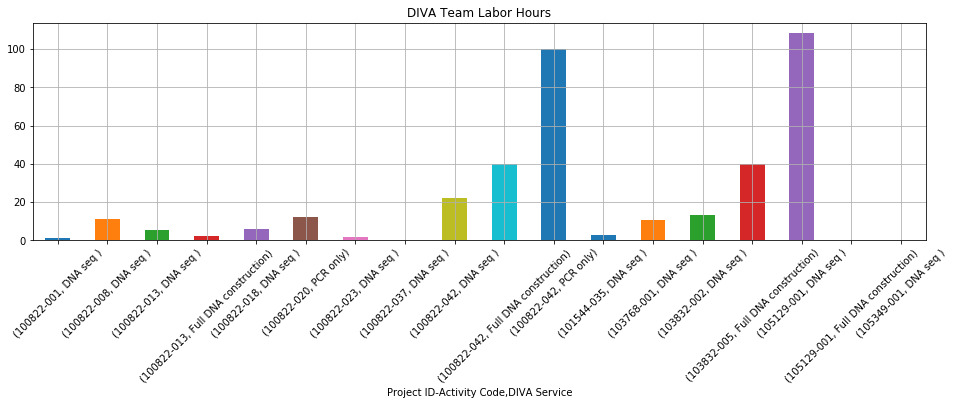

In [7]:
Project_ID_df["Hours"].plot(kind="bar",figsize=(16,4),title="DIVA Team Labor Hours",grid=True, rot=45)



,Number Rn/Construct/Sample,Hours
DIVA Service,,
DNA seq,1355,181.80
Full DNA construction,108,82.25
PCR only,202,112.02


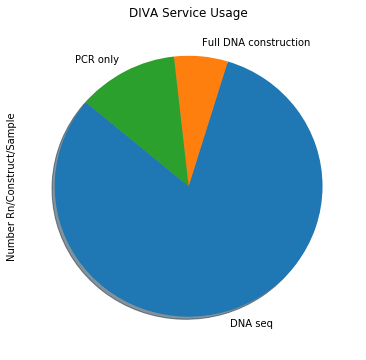

In [8]:
df_DIVA_Service = df.groupby(["DIVA Service"]).sum()
df_DIVA_Service["Number Rn/Construct/Sample"].plot(kind="pie",figsize=(6,6), title ="DIVA Service Usage",shadow= True,startangle=140)

df_DIVA_Service



Text(0.5,1,'DIVA Service FY2018_Q2 Summary')

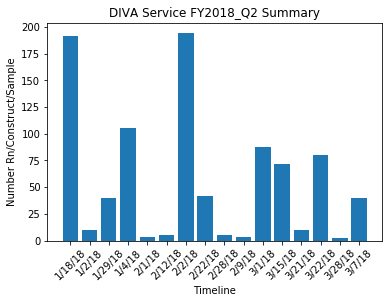

In [9]:
plt.bar(df["Date"],df["Number Rn/Construct/Sample"])
plt.xticks(rotation=45)
plt.xlabel("Timeline")
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA Service FY2018_Q2 Summary")



In [10]:
DIVA_Reagents_Cost = df.groupby(["Project ID-Activity Code"]).sum()
DIVA_Reagents_Cost = DIVA_Reagents_Cost.drop(columns=["Number Rn/Construct/Sample"])
DIVA_Reagents_Cost

,Hours
Project ID-Activity Code,
100822-001,1.10
100822-008,10.89
100822-013,7.41
100822-018,5.81
100822-020,12.00
100822-023,1.56
100822-037,0.21
100822-042,162.18
101544-035,2.89


In [11]:
DIVA_Reagents_Cost.sum()

Hours    376.07
dtype: float64

In [12]:
df_PI_user = df.groupby(["DIVA Project PI","DIVA User "]).sum()
df_PI_user

Number Rn/Construct/Sample  Hours
DIVA Project PI       DIVA User                                               
ageudes@lbl.gov       ageudes@lbl.gov                                22   2.25
amukhopadhyay@lbl.gov akothari@lbl.gov                               30   2.89
                      mwehrs@lbl.gov                                  9  12.00
hrbeller@lbl.gov      avrodrigues@lbl.gov                            27   5.81
                      paulopgenorth@lbl.gov                          21   5.12
                      tokada@lbl.gov                                 99  20.46
hscheller@lbl.gov     ageudes@lbl.gov                                20   1.29
                      yliang@lbl.gov                                 24   3.87
jdkeasling@lbl.gov    spalluk@lbl.gov                               146  14.50
jmgladden@lbl.gov     jkirby@lbl.gov                                 38   8.04
                      jmeadows@lbl.gov                               11   2.00
                      stcoradetti@lbl.gov                            52  48.89
njhillson@lbl.gov     ggoyal@lbl.gov                                750  82.67
                      jlchiniquy@lbl.gov                             24   5.08
pdadams@lbl.gov       adegiovanni@lbl.gov                             1   0.21
syuzawa@lbl.gov       azargar@lbl.gov                                43   7.40
                      bopang@lbl.gov                                  2   0.33
                      ceiben@lbl.gov                                168  51.35
                      dongliu2@lbl.gov                               11  12.67
                      jblakehedges@lbl.gov                          110  48.67
                      mthompson@lbl.gov                              20  17.23
                      pcruzmorales@lbl.gov                           37  23.34

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

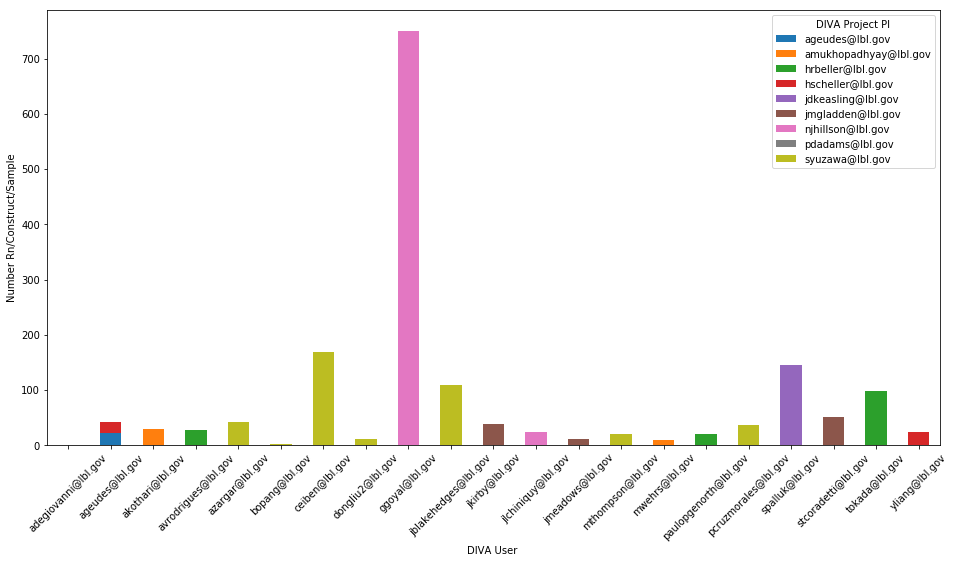

In [13]:
df_PI_user_test = df_PI_user.reset_index()


df_PI_user_test.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Project PI').plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel("Number Rn/Construct/Sample")

plt.xticks(rotation=45)

In [14]:
PI_list = df["DIVA Project PI"].unique()
PI_list

array(['njhillson@lbl.gov', 'jmgladden@lbl.gov', 'syuzawa@lbl.gov',
       'jdkeasling@lbl.gov', 'hrbeller@lbl.gov', 'amukhopadhyay@lbl.gov',
       'hscheller@lbl.gov', 'pdadams@lbl.gov', 'ageudes@lbl.gov'],
      dtype=object)

In [15]:
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [16]:
# df.count()

In [17]:
# df.dtypes

In [18]:
df['Cost']=df['Cost'].replace('[\$,]', '', regex=True).astype(float)
# df.dtypes

In [19]:
PI_list = ['njhillson@lbl.gov', 'jmgladden@lbl.gov', 'jheady@lbl.gov',
       'jdkeasling@lbl.gov', 'hrbeller@lbl.gov', 'syuzawa@lbl.gov',
       'amukhopadhyay@lbl.gov', 'hscheller@lbl.gov', 'pdadams@lbl.gov',
       'ageudes@lbl.gov']

njhillson_df = df[df["DIVA Project PI"]==PI_list[0]]
jmgladden_df = df[df["DIVA Project PI"]==PI_list[1]]
jheady_df = df[df["DIVA Project PI"]==PI_list[2]]
jdkeasling_df = df[df["DIVA Project PI"]==PI_list[3]]
hrbeller_df = df[df["DIVA Project PI"]==PI_list[4]]
syuzawa_df = df[df["DIVA Project PI"]==PI_list[5]]
amukhopadhyay_df = df[df["DIVA Project PI"]==PI_list[6]]
hscheller_df = df[df["DIVA Project PI"]==PI_list[7]]
pdadams_df = df[df["DIVA Project PI"]==PI_list[8]]
ageudes_df = df[df["DIVA Project PI"]==PI_list[9]]




DIVA Project PI: Nathan Hillson

,Cost,Hours
Project ID-Activity Code,,
103832-002,192.00,5.08
105129-001,10116.52,82.67
105349-001,957.50,0.00


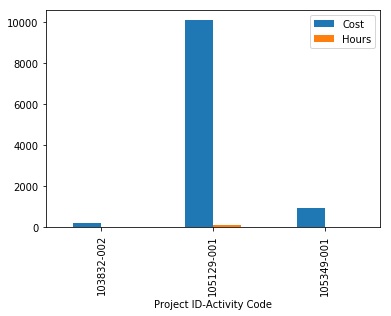

In [20]:
njhillson_df_pro = njhillson_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
njhillson_df_pro.plot(kind='bar')
njhillson_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,ggoyal@lbl.gov,DNA seq,726
1,ggoyal@lbl.gov,Full DNA construction,24
2,jlchiniquy@lbl.gov,DNA seq,24


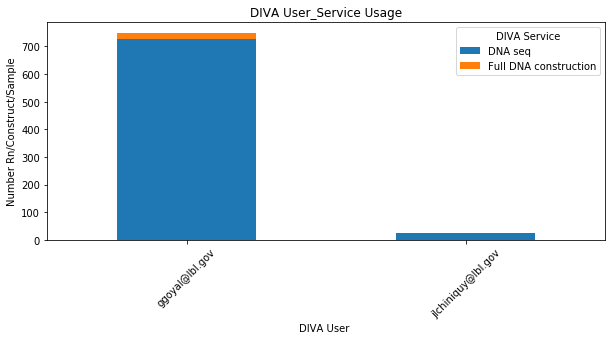

In [21]:
njhillson_df_user = njhillson_df.groupby(["DIVA User ","DIVA Service"]).sum()
njhillson_df_user = njhillson_df_user.drop(columns=["Cost","Hours"])
njhillson_df_user= njhillson_df_user.reset_index()
njhillson_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

njhillson_df_user


DIVA Project PI: John Gladden

,Cost,Hours
Project ID-Activity Code,,
100822-008,906.76,10.89
103832-002,737.20,8.04
103832-005,931.13,40.00


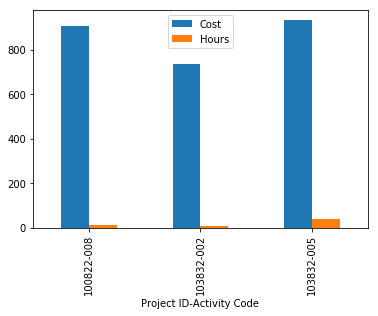

In [22]:
jmgladden_df_pro = jmgladden_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
jmgladden_df_pro.plot(kind='bar')
jmgladden_df_pro



,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,jkirby@lbl.gov,DNA seq,38
1,jmeadows@lbl.gov,DNA seq,11
2,stcoradetti@lbl.gov,DNA seq,42
3,stcoradetti@lbl.gov,Full DNA construction,10


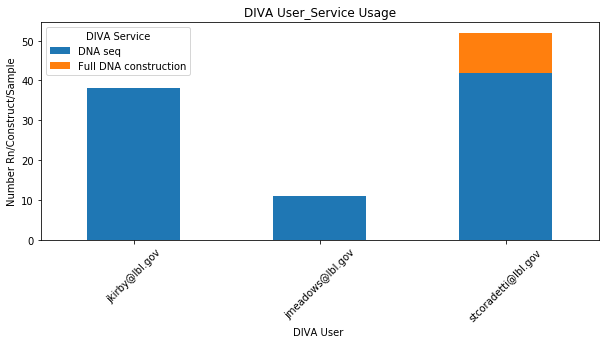

In [23]:
jmgladden_df_user = jmgladden_df.groupby(["DIVA User ","DIVA Service"]).sum()
jmgladden_df_user = jmgladden_df_user.drop(columns=["Cost","Hours"])
jmgladden_df_user= jmgladden_df_user.reset_index()
jmgladden_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

jmgladden_df_user

DIVA Project PI: Justin Heady

In [24]:
# jheady_df_pro = jheady_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
# jheady_df_pro.plot(kind='bar')
# jheady_df_pro

In [25]:
# jheady_df_user = jheady_df.groupby(["DIVA User ","DIVA Service"]).sum()
# jheady_df_user = jheady_df_user.drop(columns=["Cost","Hours"])
# jheady_df_user= jheady_df_user.reset_index()
# jheady_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
# plt.ylabel("Number Rn/Construct/Sample")
# plt.title("DIVA User_Service Usage")
# plt.xticks(rotation=45)

# jheady_df_user

DIVA Project PI: Jay Keasling

,Cost,Hours
Project ID-Activity Code,,
100822-042,1306.71,14.5


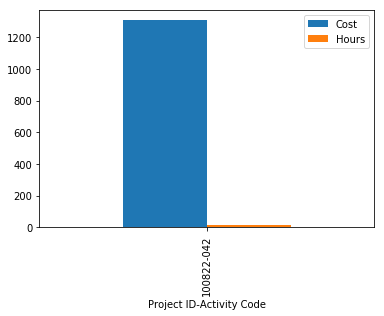

In [26]:
jdkeasling_df_pro = jdkeasling_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
jdkeasling_df_pro.plot(kind='bar')
jdkeasling_df_pro

,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,spalluk@lbl.gov,DNA seq,146


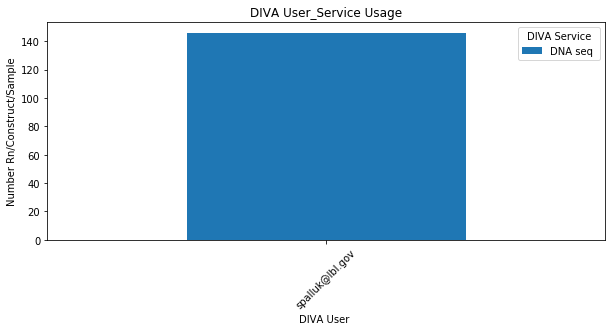

In [27]:
jdkeasling_df_user = jdkeasling_df.groupby(["DIVA User ","DIVA Service"]).sum()
jdkeasling_df_user = jdkeasling_df_user.drop(columns=["Cost","Hours"])
jdkeasling_df_user= jdkeasling_df_user.reset_index()
jdkeasling_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

jdkeasling_df_user

DIVA Project ID: Harry Beller

,Cost,Hours
Project ID-Activity Code,,
100822-018,220.32,5.81
105129-001,1074.24,25.58


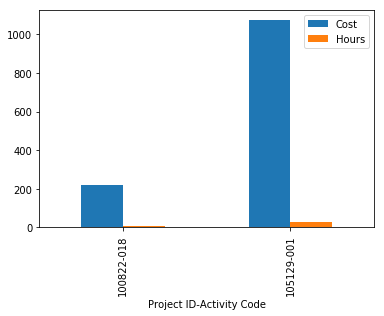

In [28]:
hrbeller_df_pro = hrbeller_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
hrbeller_df_pro.plot(kind='bar')
hrbeller_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,avrodrigues@lbl.gov,DNA seq,27
1,paulopgenorth@lbl.gov,DNA seq,21
2,tokada@lbl.gov,DNA seq,99


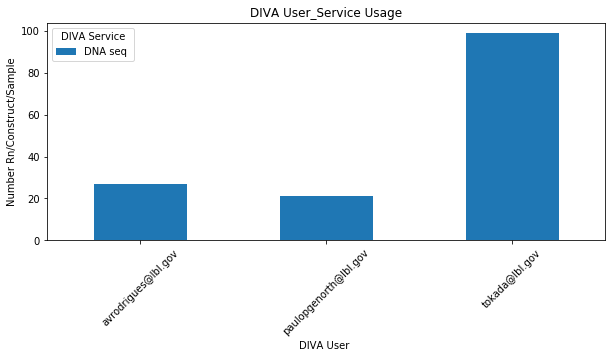

In [29]:
hrbeller_df_user = hrbeller_df.groupby(["DIVA User ","DIVA Service"]).sum()
hrbeller_df_user = hrbeller_df_user.drop(columns=["Cost","Hours"])
hrbeller_df_user= hrbeller_df_user.reset_index()
hrbeller_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

hrbeller_df_user

DIVA Project ID: Satoshi Yuzawa

,Cost,Hours
Project ID-Activity Code,,
100822-001,41.80,1.10
100822-023,200.64,1.56
100822-042,11201.38,147.68
103768-001,611.80,10.65


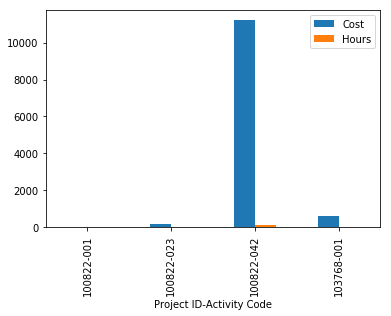

In [30]:
syuzawa_df_pro = syuzawa_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
syuzawa_df_pro.plot(kind='bar')
syuzawa_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,azargar@lbl.gov,DNA seq,43
1,bopang@lbl.gov,DNA seq,2
2,ceiben@lbl.gov,DNA seq,35
3,ceiben@lbl.gov,PCR only,133
4,dongliu2@lbl.gov,DNA seq,6
5,dongliu2@lbl.gov,PCR only,5
6,jblakehedges@lbl.gov,DNA seq,58
7,jblakehedges@lbl.gov,Full DNA construction,52
8,mthompson@lbl.gov,DNA seq,2
9,mthompson@lbl.gov,PCR only,18


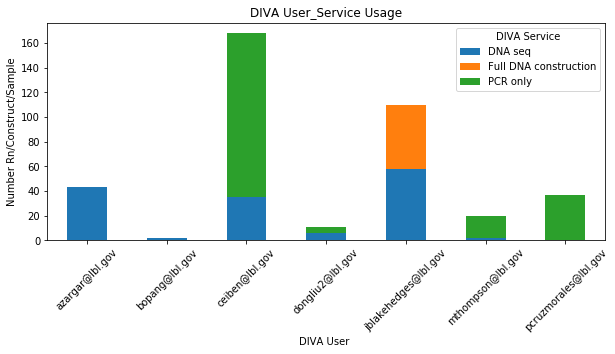

In [31]:
syuzawa_df_user = syuzawa_df.groupby(["DIVA User ","DIVA Service"]).sum()
syuzawa_df_user = syuzawa_df_user.drop(columns=["Cost","Hours"])
syuzawa_df_user= syuzawa_df_user.reset_index()
syuzawa_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

syuzawa_df_user

DIVA Project ID: Aindrila Mukhopadhyay


,Cost,Hours
Project ID-Activity Code,,
100822-020,136.6,12.00
101544-035,250.8,2.89


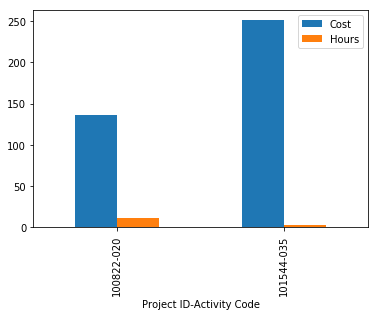

In [32]:
amukhopadhyay_df_pro = amukhopadhyay_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
amukhopadhyay_df_pro.plot(kind='bar')
amukhopadhyay_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,akothari@lbl.gov,DNA seq,30
1,mwehrs@lbl.gov,PCR only,9


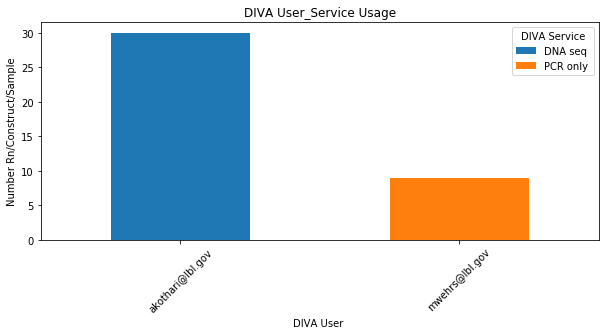

In [33]:
amukhopadhyay_df_user = amukhopadhyay_df.groupby(["DIVA User ","DIVA Service"]).sum()
amukhopadhyay_df_user = amukhopadhyay_df_user.drop(columns=["Cost","Hours"])
amukhopadhyay_df_user= amukhopadhyay_df_user.reset_index()
amukhopadhyay_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

amukhopadhyay_df_user

DIVA Project ID: Henrik Scheller


,Cost,Hours
Project ID-Activity Code,,
100822-013,363.52,5.16


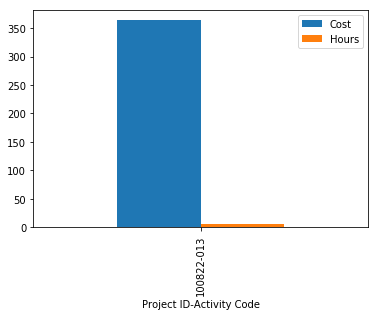

In [34]:
hscheller_df_pro = hscheller_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
hscheller_df_pro.plot(kind='bar')
hscheller_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,ageudes@lbl.gov,DNA seq,20
1,yliang@lbl.gov,DNA seq,24


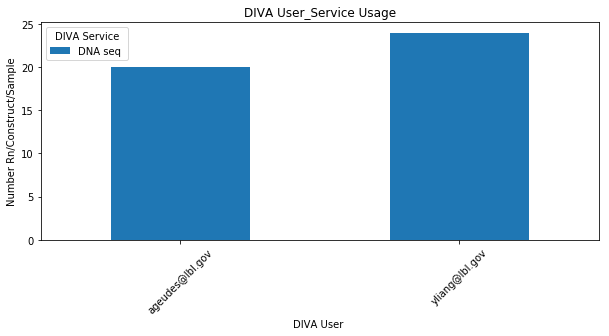

In [35]:
hscheller_df_user = hscheller_df.groupby(["DIVA User ","DIVA Service"]).sum()
hscheller_df_user = hscheller_df_user.drop(columns=["Cost","Hours"])
hscheller_df_user= hscheller_df_user.reset_index()
hscheller_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

hscheller_df_user

DIVA Project ID: Paul Adams

,Cost,Hours
Project ID-Activity Code,,
100822-037,8.0,0.21


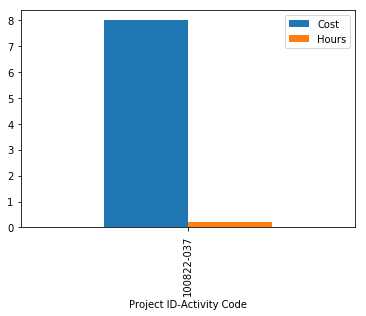

In [36]:
pdadams_df_pro = pdadams_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
pdadams_df_pro.plot(kind='bar')
pdadams_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,adegiovanni@lbl.gov,DNA seq,1


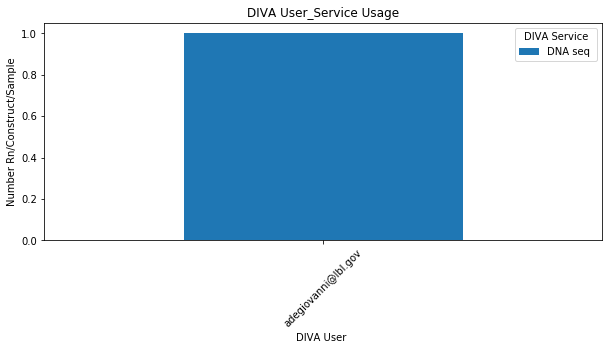

In [37]:
pdadams_df_user = pdadams_df.groupby(["DIVA User ","DIVA Service"]).sum()
pdadams_df_user = pdadams_df_user.drop(columns=["Cost","Hours"])
pdadams_df_user= pdadams_df_user.reset_index()
pdadams_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

pdadams_df_user

DIVA Project ID: Aymerick Eudes

,Cost,Hours
Project ID-Activity Code,,
100822-013,261.39,2.25


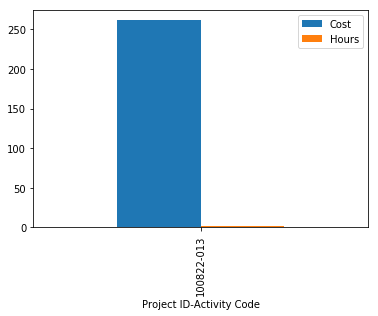

In [38]:
ageudes_df_pro = ageudes_df.groupby(["Project ID-Activity Code"]).sum().drop(columns=['Number Rn/Construct/Sample'])
ageudes_df_pro.plot(kind='bar')
ageudes_df_pro


,DIVA User,DIVA Service,Number Rn/Construct/Sample
0,ageudes@lbl.gov,Full DNA construction,22


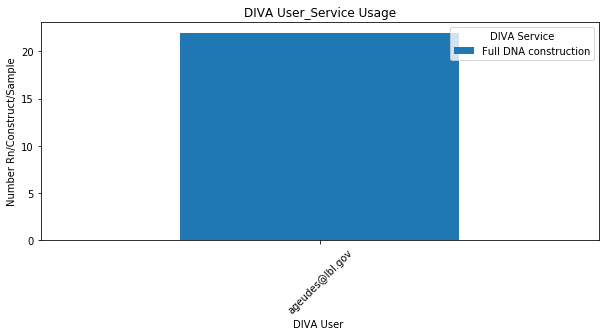

In [39]:
ageudes_df_user = ageudes_df.groupby(["DIVA User ","DIVA Service"]).sum()
ageudes_df_user = ageudes_df_user.drop(columns=["Cost","Hours"])
ageudes_df_user= ageudes_df_user.reset_index()
ageudes_df_user.pivot(index='DIVA User ',values='Number Rn/Construct/Sample',columns='DIVA Service').plot(kind='bar',stacked=True,figsize=(10,4))
plt.ylabel("Number Rn/Construct/Sample")
plt.title("DIVA User_Service Usage")
plt.xticks(rotation=45)

ageudes_df_user